In [5]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="hospitaldb",
                                           user = "postgres",
                                           password = "chanyeol",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection
con = PostgresConnection().getConnection()

successfully connected to database


In [11]:
def changetype(x):
    x['sales']=x['sales'].astype('float64') 

# Q1. Find Division Wise Sales

In [7]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT g.division, SUM(f.sales_price) " \
              "FROM star_schema.fact_table f " \
              "JOIN star_schema.geography_dim g on g.geo_key=f.geo_key " \
                "GROUP BY CUBE(g.division) " \
                "ORDER BY g.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [8]:
records


[('BARISAL', Decimal('3430130')),
 ('CHITTAGONG', Decimal('9669200')),
 ('DHAKA', Decimal('55565810')),
 ('KHULNA', Decimal('4851240')),
 ('RAJSHAHI', Decimal('5447120')),
 ('RANGPUR', Decimal('4758500')),
 ('SYLHET', Decimal('3432050')),
 (None, Decimal('87154050'))]

In [9]:
df = pd.DataFrame(records, columns=['division', 'sales'])
df

,division,sales
0,BARISAL,3430130
1,CHITTAGONG,9669200
2,DHAKA,55565810
3,KHULNA,4851240
4,RAJSHAHI,5447120
5,RANGPUR,4758500
6,SYLHET,3432050
7,None,87154050


In [10]:
df = df.dropna()
df

,division,sales
0,BARISAL,3430130
1,CHITTAGONG,9669200
2,DHAKA,55565810
3,KHULNA,4851240
4,RAJSHAHI,5447120
5,RANGPUR,4758500
6,SYLHET,3432050


In [12]:
changetype(df)

C:\Users\User\AppData\Local\Temp\ipykernel_13816\2072052650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sales']=x['sales'].astype('float64')


In [13]:
df=df.set_index(['division'])

<Axes: xlabel='division'>

<Figure size 500x200 with 0 Axes>

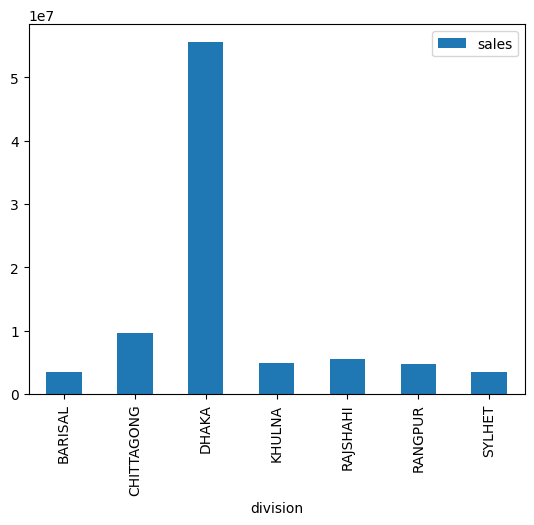

In [15]:
plt.figure(figsize=(5,2))
df.plot.bar(y='sales')

# Q2. Find hospital wise sales

In [36]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT h.hospital_name, SUM(f.sales_price) " \
              "FROM star_schema.fact_table f " \
              "JOIN star_schema.hospital_dim h on h.hospital_key=f.hospital_key " \
                "GROUP BY CUBE(h.hospital_name) " \
                "ORDER BY h.hospital_name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [37]:
records

[('BANGLADESH EYE HOSPITAL LTD.', Decimal('87154050')),
 (None, Decimal('87154050'))]

In [38]:
df = pd.DataFrame(records, columns=['hospital_name', 'sales'])
df = df.dropna()
df

,hospital_name,sales
0,BANGLADESH EYE HOSPITAL LTD.,87154050


In [39]:
# df=df.set_index(['hospital_name'])
changetype(df)

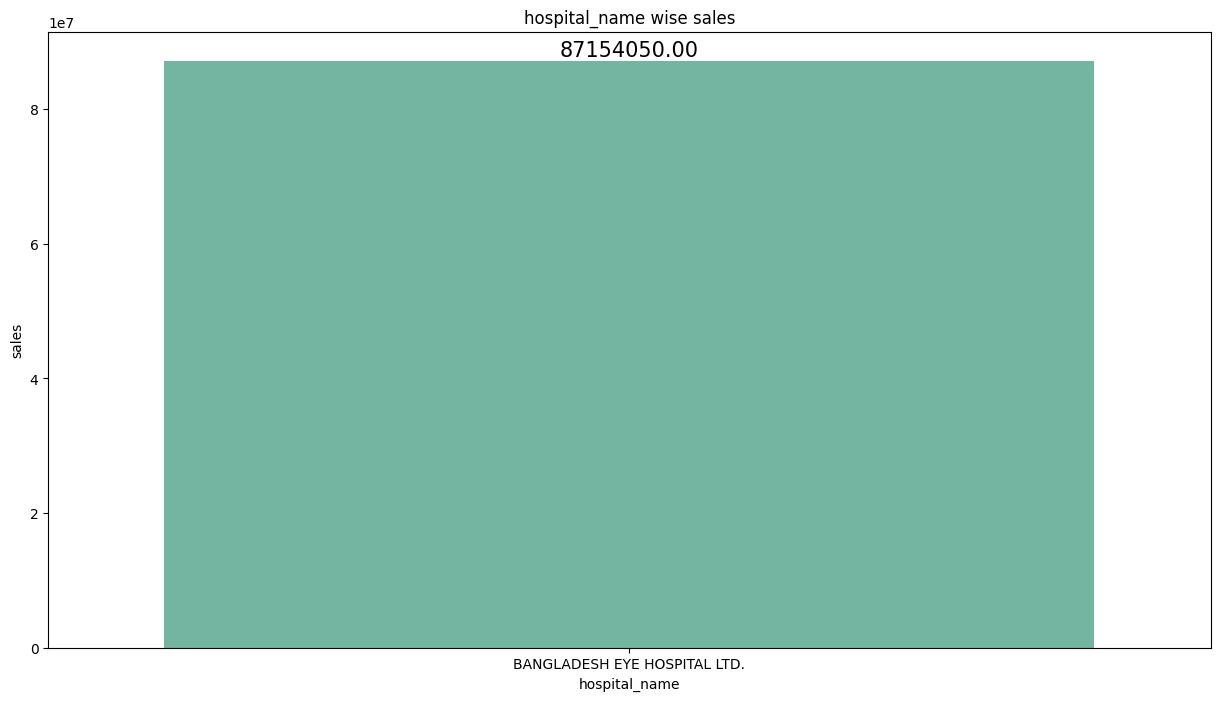

In [40]:
df.sort_values(by="sales",inplace=True,ascending=False)
#Creating bar plot
f=plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plots=sns.barplot(x=df['hospital_name'],y=df['sales'],palette='Set2')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',
                   size=15,xytext=(0, 8),
                   textcoords='offset points')
    
                   
                  
plt.xlabel('hospital_name')
plt.ylabel('sales')
plt.title('hospital_name wise sales')                        
plt.show() 

# Q3. Find the year wise sales

In [42]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.year, SUM(f.sales_price) " \
              "FROM star_schema.fact_table f " \
              "JOIN star_schema.time_dim t on t.time_key=f.time_key " \
                "GROUP BY CUBE(t.year) " \
                "ORDER BY t.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [43]:
records


[(2018, Decimal('6707240')),
 (2019, Decimal('63360130')),
 (2020, Decimal('17086680')),
 (None, Decimal('87154050'))]

In [44]:
df = pd.DataFrame(records, columns=['year', 'sales'])
df = df.dropna()
changetype(df)
df

,year,sales
0,2018.0,6707240.0
1,2019.0,63360130.0
2,2020.0,17086680.0


<Axes: title={'center': 'year wise sales'}, xlabel='year', ylabel='sales'>

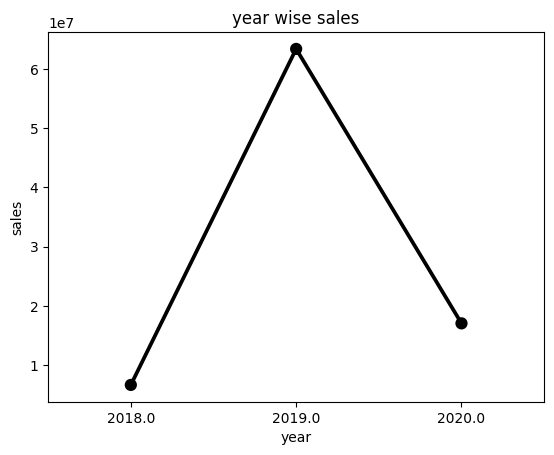

In [45]:
plt.xlabel('year')
plt.ylabel('sales')
plt.title('year wise sales')
sns.pointplot(data=df,x='year',y='sales',color='black')

# Q4. Find Top 3 Tests in Each Lab

In [52]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT ld.lab_name,td.test_name, COUNT(f.lab_key) " \
              "FROM star_schema.fact_table f " \
              "JOIN star_schema.lab_dim ld on ld.lab_key=f.lab_key " \
                "JOIN star_schema.test_dim td on td.test_key=f.test_key " \
                "GROUP BY CUBE(ld.lab_name,td.test_name) " \
                "ORDER BY ld.lab_name,COUNT(f.lab_key) DESC"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('Biochemistry', None, 43206),
 ('Biochemistry', 'Serum creatinine level', 7613),
 ('Biochemistry', 'Electrolytes Serum', 5906),
 ('Biochemistry', 'ALT(SGPT) Serum', 4195),
 ('Biochemistry', 'HbA1c', 2447),
 ('Biochemistry', 'RBG - Random blood glucose', 2385),
 ('Biochemistry', 'FBG - Fasting blood glucose', 1592),
 ('Biochemistry', 'Uric Acid Serum', 1575),
 ('Biochemistry', 'Gastric lavage for Biochemistry', 1484),
 ('Biochemistry', 'Lipid Profile Serum (F)', 1311),
 ('Biochemistry', 'Albumin Serum', 1284),
 ('Biochemistry', 'Blood calcium level', 1099),
 ('Biochemistry',
  'Renal Function Test (Urea, Creatinine, Electrolytes)',
  1021),
 ('Biochemistry', 'Bilirubin Serum', 984),
 ('Biochemistry', 'Lipid Profile Serum (R)', 910),
 ('Biochemistry', 'Blood glucose 2H post meal', 740),
 ('Biochemistry', 'Magnesium Serum', 687),
 ('Biochemistry', 'Urea Serum', 676),
 ('Biochemistry', 'Blood Gas Analysis Arterial (ABG)', 582),
 ('Biochemistry', 'Alkaline Phosphatase Serum (ALP)', 508),


In [53]:
df = pd.DataFrame(records, columns=['lab_name','test_name', 'quantity'])
df = df.dropna()

In [54]:
df

,lab_name,test_name,quantity
1,Biochemistry,Serum creatinine level,7613
2,Biochemistry,Electrolytes Serum,5906
3,Biochemistry,ALT(SGPT) Serum,4195
4,Biochemistry,HbA1c,2447
5,Biochemistry,RBG - Random blood glucose,2385
...,...,...,...
474,Serology,Chikungunya Antibody Igg ICT,2
475,Serology,Aldehyde Test (AT),1
476,Serology,RF Test,1
477,Serology,Blood Crossmatching,1


In [55]:
top3=df.groupby('lab_name').head(3)
top3.head(20)

,lab_name,test_name,quantity
1,Biochemistry,Serum creatinine level,7613
2,Biochemistry,Electrolytes Serum,5906
3,Biochemistry,ALT(SGPT) Serum,4195
134,BLOOD TRANSFUSION,Grouping + Cross Matching + Screening,681
135,BLOOD TRANSFUSION,Grouping+ICT+Cross Matching + Screening,121
136,BLOOD TRANSFUSION,RCC/Unit,79
150,Clinical Pathology,Complete Urine Analysis (Urine R/E),3680
151,Clinical Pathology,Urine R/M/E,776
152,Clinical Pathology,Stool R/E,453
203,CYTO-PATHOLOGY,Paps Smear Reporting,99


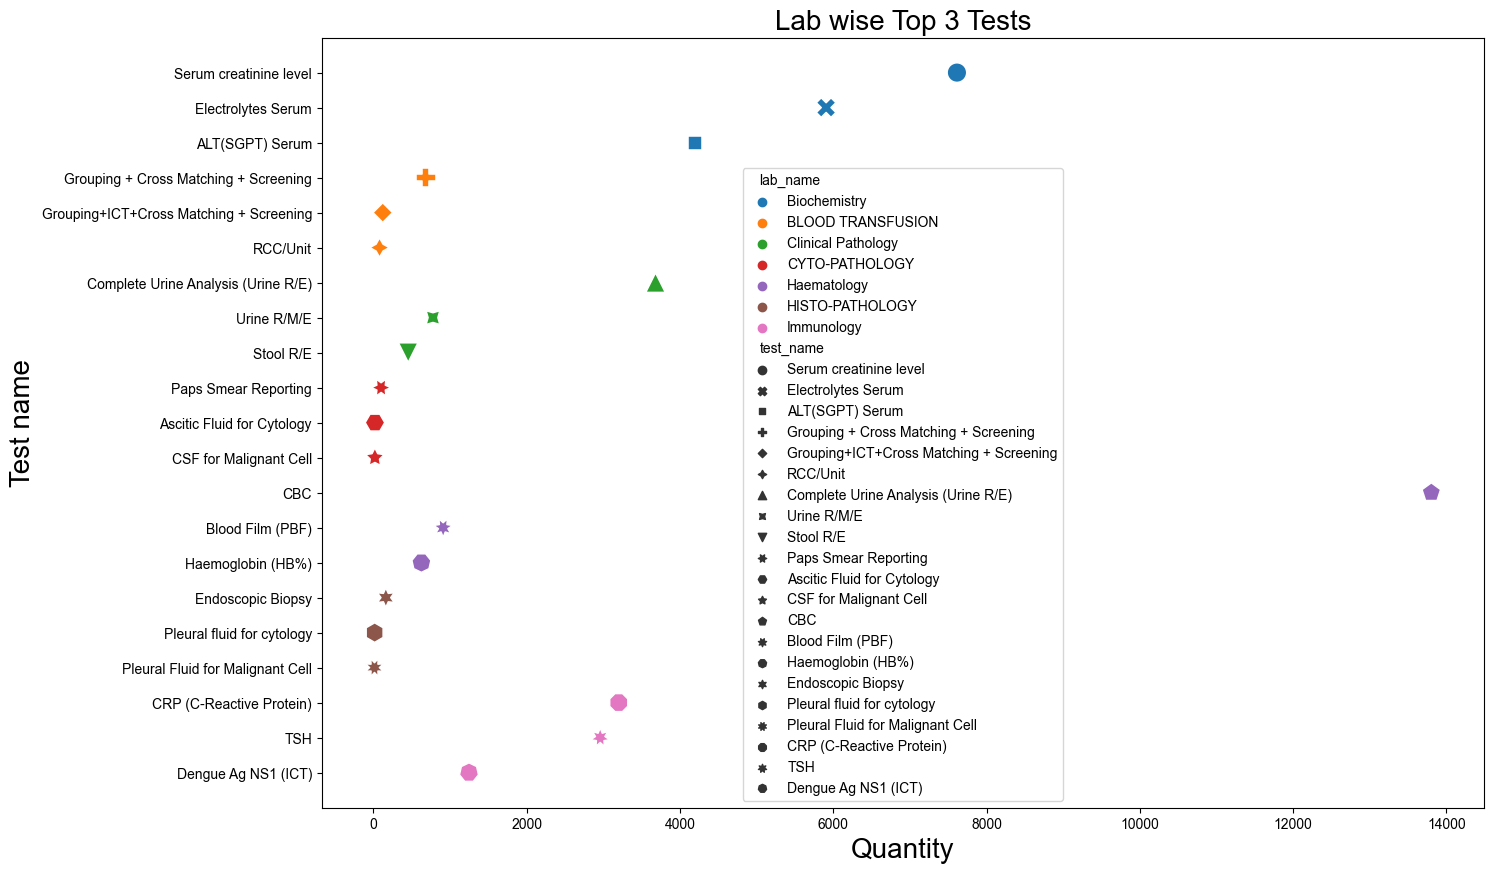

In [57]:
top_=top3[0:21]
plt.figure(figsize=(15,10))
plt.title('Lab wise Top 3 Tests',fontsize=20)
plt.ylabel('Test name',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
sns.scatterplot(data=top_,x="quantity",y="test_name",hue="lab_name",palette="tab10",s=200,style="test_name")
sns.set(font_scale=2)

# Q5. Find the top5 tests conducted in each year

In [68]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT td.year,cd.test_name, COUNT(f.test_key)" \
              "FROM star_schema.fact_table f " \
                "JOIN star_schema.time_dim td on td.time_key=f.time_key " \
                "JOIN star_schema.test_dim cd on cd.test_key=f.test_key " \
                "GROUP BY CUBE(td.year,cd.test_name) ORDER BY td.year,COUNT(f.test_key) DESC"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(2018, None, 6946),
 (2018, 'CBC', 992),
 (2018, 'Serum creatinine level', 606),
 (2018, 'Electrolytes Serum', 536),
 (2018, 'ALT(SGPT) Serum', 330),
 (2018, 'Urine R/M/E', 280),
 (2018, 'CRP (C-Reactive Protein)', 278),
 (2018, 'TSH', 159),
 (2018, 'RBG - Random blood glucose', 152),
 (2018, 'Urine for C/S', 137),
 (2018, 'HbA1c', 128),
 (2018, 'Prothrombin Time (PT)', 114),
 (2018, 'Albumin Serum', 108),
 (2018, 'FBG - Fasting blood glucose', 106),
 (2018, 'Bilirubin Serum', 103),
 (2018, 'Renal Function Test (Urea, Creatinine, Electrolytes)', 101),
 (2018, 'Troponin I', 98),
 (2018, 'Urea Serum', 97),
 (2018, 'Grouping + Cross Matching + Screening', 95),
 (2018, 'Lipid Profile Serum (F)', 86),
 (2018, 'Blood Gas Analysis Arterial (ABG)', 85),
 (2018, 'Blood calcium level', 85),
 (2018, 'Uric Acid Serum', 78),
 (2018, 'Blood Grouping and Rh Factor', 74),
 (2018, 'Blood for C/S', 73),
 (2018, 'HBs Ag', 67),
 (2018, 'Magnesium Serum', 66),
 (2018, 'Anti-HCV', 66),
 (2018, 'Vitamin D3 

In [69]:
df = pd.DataFrame(records, columns=['year','test_name', 'quantity'])
df = df.dropna()
top5=df.groupby('year').head(5)


In [70]:
top5.sort_values(by=['year'])

,year,test_name,quantity
1,2018.0,CBC,992
2,2018.0,Serum creatinine level,606
3,2018.0,Electrolytes Serum,536
4,2018.0,ALT(SGPT) Serum,330
5,2018.0,Urine R/M/E,280
281,2019.0,CBC,10329
282,2019.0,Serum creatinine level,5588
283,2019.0,Electrolytes Serum,4314
284,2019.0,ALT(SGPT) Serum,3052
285,2019.0,Complete Urine Analysis (Urine R/E),2844


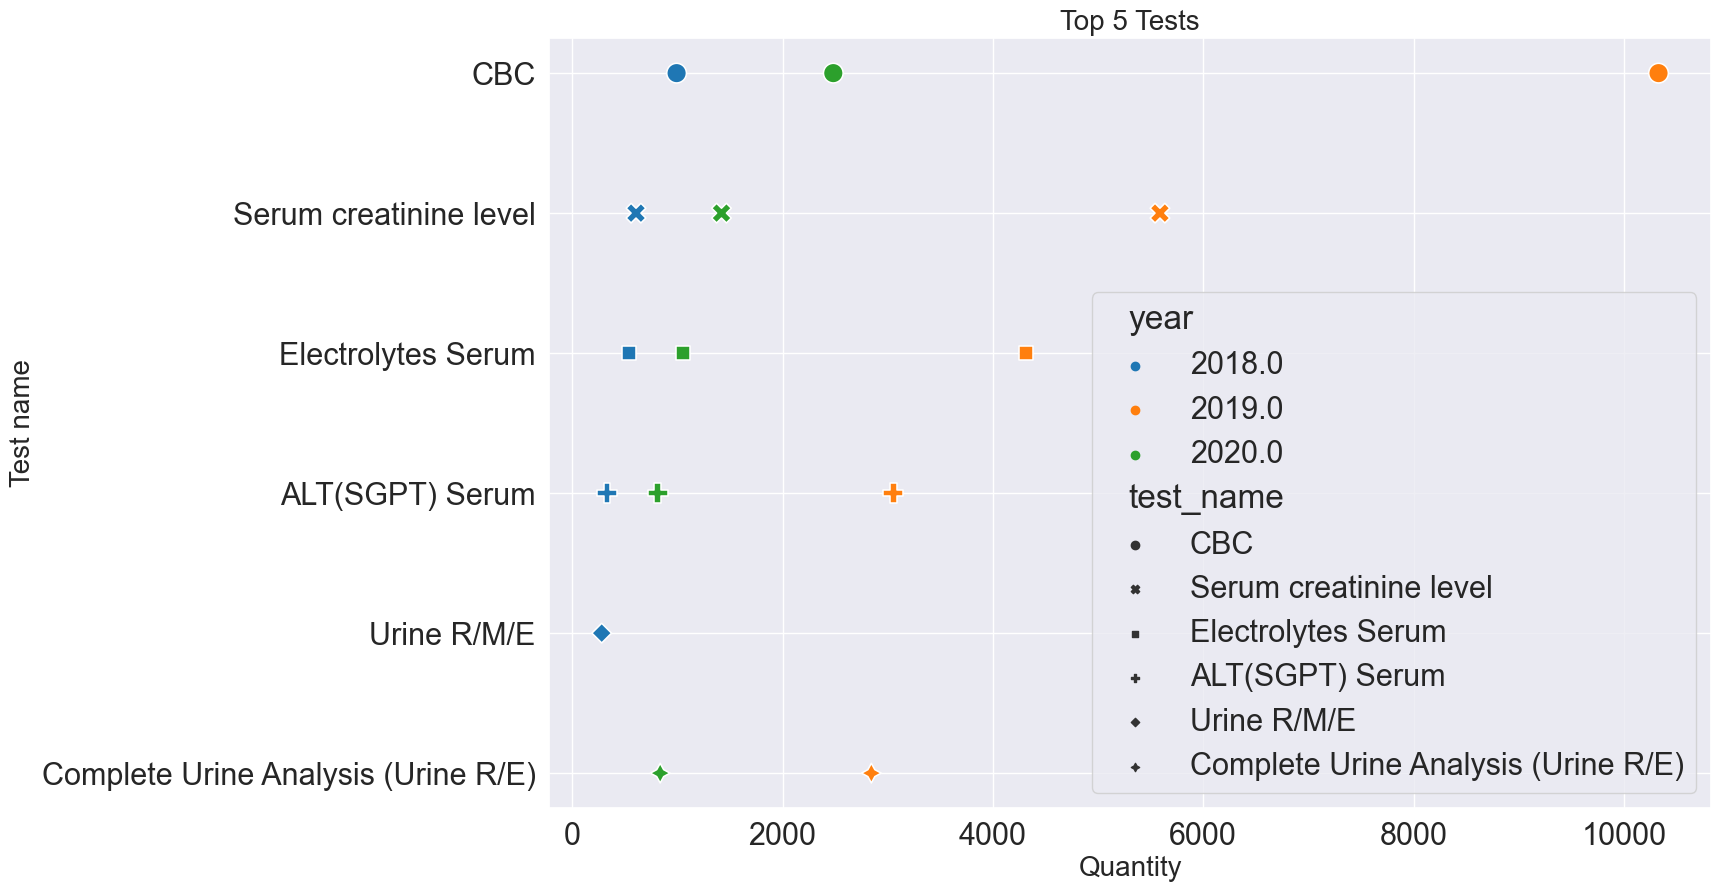

In [71]:
top_=top5
plt.figure(figsize=(15,10))
plt.title('Top 5 Tests',fontsize=20)
plt.ylabel('Test name',fontsize=20)
plt.xlabel('Quantity',fontsize=20)
sns.scatterplot(data=top_,x="quantity",y="test_name",hue="year",palette="tab10",s=200,style="test_name")
sns.set(font_scale=2)